In [68]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import re

mp.rcParams['axes.unicode_minus'] = False

In [69]:
fm = mp.font_manager.FontManager()
plt.rcParams["font.family"] = 'Malgun Gothic'

In [70]:
df_acc = pd.read_csv('./data/04_범죄유형별 소년범죄자 공범관계_홍상석1.csv')
df_acc.head(10)

,No,자료시점,분류,분류.1,분류.2,계,계.1,계.2,계.3,계.4,계.5,계.6,계.7,계.8,계.9,계.10,계.11,계.12
0,No,자료시점,분류,분류,분류,계,단독범,공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),미상
1,No,자료시점,분류,분류,분류,계,단독범,공범(소계),학교동창,교도소·소년원친구,직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
2,No,자료시점,분류,분류,분류,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,1,2018년,계,계[입력치],계[입력치],"66,142","31,713","27,554","9,543",195,63,234,2,"12,711",551,471,"3,784","6,875"
4,2,2018년,형법범,형법범계[입력치],형법범계[입력치],"54,205","22,845","25,818","9,100",188,46,224,2,"11,963",535,430,"3,330","5,542"
5,3,2018년,형법범,재산범죄,재산범죄의 계[입력치],"26,497","9,988","14,970","4,898",170,17,100,1,"7,217",311,307,"1,949","1,539"
6,4,2018년,형법범,재산범죄,배임,2,0,1,0,0,0,0,0,0,0,0,1,1
7,5,2018년,형법범,재산범죄,사기,"6,968","3,737","2,304",427,40,5,10,1,"1,084",61,79,597,927
8,6,2018년,형법범,재산범죄,손괴,940,648,190,67,0,0,0,0,94,3,1,25,102
9,7,2018년,형법범,재산범죄,장물,290,179,100,35,1,0,3,0,43,0,2,16,11


In [71]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   No      123 non-null    object
 1   자료시점    123 non-null    object
 2   분류      123 non-null    object
 3   분류.1    123 non-null    object
 4   분류.2    123 non-null    object
 5   계       123 non-null    object
 6   계.1     123 non-null    object
 7   계.2     123 non-null    object
 8   계.3     123 non-null    object
 9   계.4     123 non-null    object
 10  계.5     123 non-null    object
 11  계.6     123 non-null    object
 12  계.7     123 non-null    object
 13  계.8     123 non-null    object
 14  계.9     123 non-null    object
 15  계.10    123 non-null    object
 16  계.11    123 non-null    object
 17  계.12    123 non-null    object
dtypes: object(18)
memory usage: 17.4+ KB


In [72]:
df_acc.columns # 현재 데이터에 column명을 확인 가능

Index(['No', '자료시점', '분류', '분류.1', '분류.2', '계', '계.1', '계.2', '계.3', '계.4',
       '계.5', '계.6', '계.7', '계.8', '계.9', '계.10', '계.11', '계.12'],
      dtype='object')

In [73]:
df_acc = df_acc.rename(columns={'분류':'대분류', '분류.1':'중분류','분류.2':'소분류','계':'총합계',
                                              '계.1':'단독범','계.2':'공범 소계', '계.3':'학교동창', '계.4':'교도소,소년원친구',
                                              '계.5':'직장동료','계.6':'친인척','계.7':'군동료','계.8':'동네친구',
                                              '계.9':'고향친구','계.10':'애인','계.11':'기타','계.12':'미상'})

In [74]:
thousands = ['대분류', '중분류', '소분류', '총합계', '단독범', '공범 소계', '학교동창', '교도소,소년원친구',
               '직장동료', '친인척', '군동료', '동네친구', '고향친구', '애인', '기타', '미상']
 
for thousand in thousands:
    df_acc[thousand]=df_acc[thousand].str.replace(',','')

In [75]:
df_acc = df_acc.drop(['No','자료시점'], axis='columns')                     # 열 삭제

In [76]:
df_acc = df_acc.drop(index = [0,1,2,3,4])                                   # 행 삭제

In [77]:
df_acc['총합계'] = df_acc['총합계'].astype(float)
df_acc['단독범'] = df_acc['단독범'].astype(float)
df_acc['공범 소계'] = df_acc['공범 소계'].astype(float)
df_acc['학교동창'] = df_acc['학교동창'].astype(float)
df_acc['교도소,소년원친구'] = df_acc['교도소,소년원친구'].astype(float)
df_acc['직장동료'] = df_acc['직장동료'].astype(float)
df_acc['친인척'] = df_acc['친인척'].astype(float)
df_acc['군동료'] = df_acc['군동료'].astype(float)
df_acc['동네친구'] = df_acc['동네친구'].astype(float)
df_acc['고향친구'] = df_acc['고향친구'].astype(float)
df_acc['애인'] = df_acc['애인'].astype(float)
df_acc['기타'] = df_acc['기타'].astype(float)
df_acc['미상'] = df_acc['미상'].astype(float)

In [78]:
df_acc1 = df_acc[df_acc["소분류"].str.contains("입력치", case=False, na=True)].copy()    # case = False 는 대소문자 구분 없이 찾는다 na = nan도 표기해준다
df_acc1

,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
5,형법범,재산범죄,재산범죄의 계[입력치],26497.0,9988.0,14970.0,4898.0,170.0,17.0,100.0,1.0,7217.0,311.0,307.0,1949.0,1539.0
12,형법범,강력범죄(흉악),강력범죄(흉악)의 계[입력치],3509.0,2430.0,730.0,264.0,4.0,0.0,3.0,1.0,325.0,16.0,8.0,109.0,349.0
17,형법범,강력범죄(폭력),강력범죄(폭력)의 계[입력치],19742.0,8080.0,8819.0,3444.0,10.0,23.0,110.0,0.0,3889.0,179.0,90.0,1074.0,2843.0
26,형법범,위조범죄,위조범죄의 계[입력치],1511.0,975.0,465.0,150.0,3.0,0.0,2.0,0.0,201.0,8.0,11.0,90.0,71.0
31,형법범,공무원범죄,공무원범죄의 계[입력치],3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
36,형법범,풍속범죄,풍속범죄의 계[입력치],223.0,135.0,25.0,1.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,13.0,63.0
40,형법범,과실범죄,과실범죄의 계[입력치],157.0,91.0,41.0,24.0,0.0,0.0,0.0,0.0,11.0,2.0,0.0,4.0,25.0
44,형법범,기타형법범죄,기타형법범죄의 계[입력치],2563.0,1146.0,767.0,319.0,1.0,6.0,9.0,0.0,309.0,19.0,14.0,90.0,650.0
61,특별법범,특별법범의 계[입력치],특별법범의 계[입력치],11937.0,8868.0,1736.0,443.0,7.0,17.0,10.0,0.0,748.0,16.0,41.0,454.0,1333.0


<ipython-input-82-2ddc2ade64e0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_acc1.groupby('중분류')['단독범','공범 소계'].mean().plot.bar()


<AxesSubplot:xlabel='중분류'>

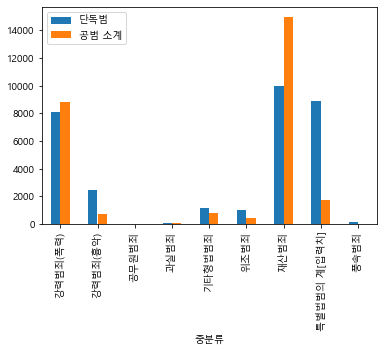

In [82]:
df_acc1.groupby('중분류')['단독범','공범 소계'].mean().plot.bar()

<ipython-input-13-218252619711>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_acc1.groupby('소분류')['단독범','공범 소계'].mean().plot.bar()


<AxesSubplot:xlabel='소분류'>

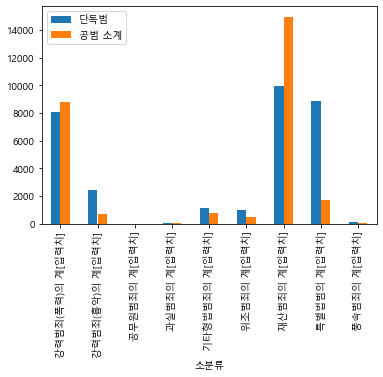

In [13]:
df_acc1.groupby('소분류')['단독범','공범 소계'].mean().plot.bar()

# 1) 공범 소계 vs 단독범 (카테고리 소계)   ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑

## 결론:

### 단독이든 공범이든 재산범죄 -> 강력범죄 순으로 많이 일어납니다.
### 재산범죄의 경우 공범의 경우가 높습니다.

### 특별법범은 단독이 많습니다

#### 특별법범은 다음과 같음 ####
개발제한구역의지정및관리에관한특별조치법,개인정보보호법,건축법,게임산업진흥에관한법률,경범죄처벌법,공유재산및물품관리법,공인중개사법,공중위생관리법,공직선거법,교통사고처리특례법,국민체육진흥법,국토의계획및이용에관한법률,근로기준법,근로자퇴직급여보장법,농수산물의원산지표시에관한법률,농지법,대기환경보전법,대부업등의등록및금융이용자보호에관한법률,도로교통법,도로법,마약류관리에관한법률,병역법,부정경쟁,방지및영업비밀보호에관한법률,부정수표단속법,사행행위등규제및처벌특례법,산림자원의조성및관리에관한법률,산업안전보건법,산지관리법,상표법,선박안전법,선박직원법,성매매알선등행위의처벌에관한법률,수산업법,수산자원관리법,물환경보전법,식품위생법,아동·청소년의성보호에관한률(성매수등),아동·청소년의성보호에관한법률(음란물등),아동복지법,여객자동차운수사업법,여신전문금융업법,외국환거래법,의료법,자동차관리법,자동차손해배상보장법,저작권법,전자금융거래법,정보통신망이용촉진및정보보호등에관한법률,조세범처벌법,주민등록법,청소년보호법,축산물위생관리법,출입국관리법,통신비밀보호법,특가법(도주차량),폐기물관리법,풍속영업의규제에관한법률,학원의설립운영및과외교습에관한법률,예비군법,화물자동차운수사업법,기타특별법

In [14]:
df_acc.head(10)

,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
5,형법범,재산범죄,재산범죄의 계[입력치],26497.0,9988.0,14970.0,4898.0,170.0,17.0,100.0,1.0,7217.0,311.0,307.0,1949.0,1539.0
6,형법범,재산범죄,배임,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,형법범,재산범죄,사기,6968.0,3737.0,2304.0,427.0,40.0,5.0,10.0,1.0,1084.0,61.0,79.0,597.0,927.0
8,형법범,재산범죄,손괴,940.0,648.0,190.0,67.0,0.0,0.0,0.0,0.0,94.0,3.0,1.0,25.0,102.0
9,형법범,재산범죄,장물,290.0,179.0,100.0,35.0,1.0,0.0,3.0,0.0,43.0,0.0,2.0,16.0,11.0
10,형법범,재산범죄,절도,16904.0,4466.0,12005.0,4225.0,129.0,11.0,83.0,0.0,5844.0,239.0,217.0,1257.0,433.0
11,형법범,재산범죄,횡령,1393.0,958.0,370.0,144.0,0.0,1.0,4.0,0.0,152.0,8.0,8.0,53.0,65.0
12,형법범,강력범죄(흉악),강력범죄(흉악)의 계[입력치],3509.0,2430.0,730.0,264.0,4.0,0.0,3.0,1.0,325.0,16.0,8.0,109.0,349.0
13,형법범,강력범죄(흉악),강도,215.0,27.0,181.0,27.0,4.0,0.0,0.0,0.0,95.0,15.0,6.0,34.0,7.0
14,형법범,강력범죄(흉악),방화,110.0,48.0,59.0,23.0,0.0,0.0,2.0,1.0,29.0,0.0,0.0,4.0,3.0


In [15]:
df_acc2 = df_acc[~df_acc["소분류"].str.contains("입력치", case=False, na=True)].copy()    # case = False 는 대소문자 구분 없이 찾는다 na= nan도 표기해준다
df_acc2

,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
6,형법범,재산범죄,배임,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,형법범,재산범죄,사기,6968.0,3737.0,2304.0,427.0,40.0,5.0,10.0,1.0,1084.0,61.0,79.0,597.0,927.0
8,형법범,재산범죄,손괴,940.0,648.0,190.0,67.0,0.0,0.0,0.0,0.0,94.0,3.0,1.0,25.0,102.0
9,형법범,재산범죄,장물,290.0,179.0,100.0,35.0,1.0,0.0,3.0,0.0,43.0,0.0,2.0,16.0,11.0
10,형법범,재산범죄,절도,16904.0,4466.0,12005.0,4225.0,129.0,11.0,83.0,0.0,5844.0,239.0,217.0,1257.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,특별법범,풍속영업의규제에관한법률,풍속영업의규제에관한법률,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
119,특별법범,학원의설립운영및과외교습에관한법률,학원의설립운영및과외교습에관한법률,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,특별법범,예비군법,예비군법,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,특별법범,화물자동차운수사업법,화물자동차운수사업법,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_acc2 = df_acc2[df_acc2['총합계'].copy()>=1].loc[:]
df_acc2.head()

,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
6,형법범,재산범죄,배임,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,형법범,재산범죄,사기,6968.0,3737.0,2304.0,427.0,40.0,5.0,10.0,1.0,1084.0,61.0,79.0,597.0,927.0
8,형법범,재산범죄,손괴,940.0,648.0,190.0,67.0,0.0,0.0,0.0,0.0,94.0,3.0,1.0,25.0,102.0
9,형법범,재산범죄,장물,290.0,179.0,100.0,35.0,1.0,0.0,3.0,0.0,43.0,0.0,2.0,16.0,11.0
10,형법범,재산범죄,절도,16904.0,4466.0,12005.0,4225.0,129.0,11.0,83.0,0.0,5844.0,239.0,217.0,1257.0,433.0


In [17]:
%matplotlib qt
df_acc2.groupby('소분류')['단독범','공범 소계'].mean().plot.bar()

<ipython-input-17-106afe6ce0b6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_acc2.groupby('소분류')['단독범','공범 소계'].mean().plot.bar()


<AxesSubplot:xlabel='소분류'>

# 2-1) 공범 소계 vs 단독범 (범죄 이름 별)   ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑

In [18]:
df_acc2 = df_acc2[df_acc2['총합계'].copy()>=1000].loc[:]
df_acc2.head()

,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
7,형법범,재산범죄,사기,6968.0,3737.0,2304.0,427.0,40.0,5.0,10.0,1.0,1084.0,61.0,79.0,597.0,927.0
10,형법범,재산범죄,절도,16904.0,4466.0,12005.0,4225.0,129.0,11.0,83.0,0.0,5844.0,239.0,217.0,1257.0,433.0
11,형법범,재산범죄,횡령,1393.0,958.0,370.0,144.0,0.0,1.0,4.0,0.0,152.0,8.0,8.0,53.0,65.0
16,형법범,강력범죄(흉악),성폭력,3173.0,2350.0,486.0,212.0,0.0,0.0,1.0,0.0,201.0,1.0,2.0,69.0,337.0
18,형법범,강력범죄(폭력),공갈,1791.0,663.0,1022.0,274.0,4.0,1.0,3.0,0.0,575.0,19.0,14.0,132.0,106.0


In [19]:
%matplotlib qt
df_acc2.groupby('소분류')['단독범','공범 소계'].mean().plot.bar()

<ipython-input-19-106afe6ce0b6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_acc2.groupby('소분류')['단독범','공범 소계'].mean().plot.bar()


<AxesSubplot:xlabel='소분류'>

# 2-2) 공범 소계 vs 단독범 (범죄 이름 별 1000건 이상)   ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑

## 결론:

### 단독범은 폭행 > 절도 >도로교통법 > 사기 성폭력 > 상해 > 교통사고처리특례법 순으로 범죄가 많습니다.
### 공범의 경우 절도 > 폭행 > 상해 > 사기 순으로 범죄가 많습니다.

In [20]:
df_acc.head(10)

,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
5,형법범,재산범죄,재산범죄의 계[입력치],26497.0,9988.0,14970.0,4898.0,170.0,17.0,100.0,1.0,7217.0,311.0,307.0,1949.0,1539.0
6,형법범,재산범죄,배임,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,형법범,재산범죄,사기,6968.0,3737.0,2304.0,427.0,40.0,5.0,10.0,1.0,1084.0,61.0,79.0,597.0,927.0
8,형법범,재산범죄,손괴,940.0,648.0,190.0,67.0,0.0,0.0,0.0,0.0,94.0,3.0,1.0,25.0,102.0
9,형법범,재산범죄,장물,290.0,179.0,100.0,35.0,1.0,0.0,3.0,0.0,43.0,0.0,2.0,16.0,11.0
10,형법범,재산범죄,절도,16904.0,4466.0,12005.0,4225.0,129.0,11.0,83.0,0.0,5844.0,239.0,217.0,1257.0,433.0
11,형법범,재산범죄,횡령,1393.0,958.0,370.0,144.0,0.0,1.0,4.0,0.0,152.0,8.0,8.0,53.0,65.0
12,형법범,강력범죄(흉악),강력범죄(흉악)의 계[입력치],3509.0,2430.0,730.0,264.0,4.0,0.0,3.0,1.0,325.0,16.0,8.0,109.0,349.0
13,형법범,강력범죄(흉악),강도,215.0,27.0,181.0,27.0,4.0,0.0,0.0,0.0,95.0,15.0,6.0,34.0,7.0
14,형법범,강력범죄(흉악),방화,110.0,48.0,59.0,23.0,0.0,0.0,2.0,1.0,29.0,0.0,0.0,4.0,3.0


In [21]:
df_acc4 = df_acc[~df_acc["소분류"].str.contains("입력치", case=False, na=True)].copy()    # case = False 는 대소문자 구분 없이 찾는다 na= nan도 표기해준다
df_acc4

,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
6,형법범,재산범죄,배임,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,형법범,재산범죄,사기,6968.0,3737.0,2304.0,427.0,40.0,5.0,10.0,1.0,1084.0,61.0,79.0,597.0,927.0
8,형법범,재산범죄,손괴,940.0,648.0,190.0,67.0,0.0,0.0,0.0,0.0,94.0,3.0,1.0,25.0,102.0
9,형법범,재산범죄,장물,290.0,179.0,100.0,35.0,1.0,0.0,3.0,0.0,43.0,0.0,2.0,16.0,11.0
10,형법범,재산범죄,절도,16904.0,4466.0,12005.0,4225.0,129.0,11.0,83.0,0.0,5844.0,239.0,217.0,1257.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,특별법범,풍속영업의규제에관한법률,풍속영업의규제에관한법률,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
119,특별법범,학원의설립운영및과외교습에관한법률,학원의설립운영및과외교습에관한법률,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,특별법범,예비군법,예비군법,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,특별법범,화물자동차운수사업법,화물자동차운수사업법,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df_acc4 = df_acc4[df_acc4['총합계'].copy()>=1000].loc[:]
df_acc4.head()

,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
7,형법범,재산범죄,사기,6968.0,3737.0,2304.0,427.0,40.0,5.0,10.0,1.0,1084.0,61.0,79.0,597.0,927.0
10,형법범,재산범죄,절도,16904.0,4466.0,12005.0,4225.0,129.0,11.0,83.0,0.0,5844.0,239.0,217.0,1257.0,433.0
11,형법범,재산범죄,횡령,1393.0,958.0,370.0,144.0,0.0,1.0,4.0,0.0,152.0,8.0,8.0,53.0,65.0
16,형법범,강력범죄(흉악),성폭력,3173.0,2350.0,486.0,212.0,0.0,0.0,1.0,0.0,201.0,1.0,2.0,69.0,337.0
18,형법범,강력범죄(폭력),공갈,1791.0,663.0,1022.0,274.0,4.0,1.0,3.0,0.0,575.0,19.0,14.0,132.0,106.0


In [23]:
%matplotlib qt
df_acc4.groupby('소분류')['학교동창','교도소,소년원친구','직장동료','친인척','군동료','동네친구','고향친구','애인','기타','미상'].mean().plot.bar()

<ipython-input-23-6300f399b1b3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_acc4.groupby('소분류')['학교동창','교도소,소년원친구','직장동료','친인척','군동료','동네친구','고향친구','애인','기타','미상'].mean().plot.bar()


<AxesSubplot:xlabel='소분류'>

# 3) 공범 (범죄 이름 별 1000건 이상)   ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑

## 결론: 누가 누구와 범죄를 함께 하는가?

### 절도, 폭행, 상해, 사기는 동네친구 > 학교동창과 함께 하게 되는 경우가 많았으며 미상의 대상과도 함께 합니다


# 이하 2차 추가 분석 데이터

In [128]:
df_acc = pd.read_csv('./data/04_범죄유형별 소년범죄자 공범관계_홍상석1.csv')
df_acc.head(10)

,No,자료시점,분류,분류.1,분류.2,계,계.1,계.2,계.3,계.4,계.5,계.6,계.7,계.8,계.9,계.10,계.11,계.12
0,No,자료시점,분류,분류,분류,계,단독범,공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),미상
1,No,자료시점,분류,분류,분류,계,단독범,공범(소계),학교동창,교도소·소년원친구,직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
2,No,자료시점,분류,분류,분류,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,1,2018년,계,계[입력치],계[입력치],"66,142","31,713","27,554","9,543",195,63,234,2,"12,711",551,471,"3,784","6,875"
4,2,2018년,형법범,형법범계[입력치],형법범계[입력치],"54,205","22,845","25,818","9,100",188,46,224,2,"11,963",535,430,"3,330","5,542"
5,3,2018년,형법범,재산범죄,재산범죄의 계[입력치],"26,497","9,988","14,970","4,898",170,17,100,1,"7,217",311,307,"1,949","1,539"
6,4,2018년,형법범,재산범죄,배임,2,0,1,0,0,0,0,0,0,0,0,1,1
7,5,2018년,형법범,재산범죄,사기,"6,968","3,737","2,304",427,40,5,10,1,"1,084",61,79,597,927
8,6,2018년,형법범,재산범죄,손괴,940,648,190,67,0,0,0,0,94,3,1,25,102
9,7,2018년,형법범,재산범죄,장물,290,179,100,35,1,0,3,0,43,0,2,16,11


In [129]:
df_acc = df_acc.rename(columns={'분류':'대분류', '분류.1':'중분류','분류.2':'소분류','계':'총합계',
                                              '계.1':'단독범','계.2':'공범 소계', '계.3':'학교동창', '계.4':'교도소,소년원친구',
                                              '계.5':'직장동료','계.6':'친인척','계.7':'군동료','계.8':'동네친구',
                                              '계.9':'고향친구','계.10':'애인','계.11':'기타','계.12':'미상'})

In [130]:
thousands = ['대분류', '중분류', '소분류', '총합계', '단독범', '공범 소계', '학교동창', '교도소,소년원친구',
               '직장동료', '친인척', '군동료', '동네친구', '고향친구', '애인', '기타', '미상']
 
for thousand in thousands:
    df_acc[thousand]=df_acc[thousand].str.replace(',','')

In [131]:
df_acc.head()

,No,자료시점,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
0,No,자료시점,분류,분류,분류,계,단독범,공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),미상
1,No,자료시점,분류,분류,분류,계,단독범,공범(소계),학교동창,교도소·소년원친구,직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
2,No,자료시점,분류,분류,분류,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,1,2018년,계,계[입력치],계[입력치],66142,31713,27554,9543,195,63,234,2,12711,551,471,3784,6875
4,2,2018년,형법범,형법범계[입력치],형법범계[입력치],54205,22845,25818,9100,188,46,224,2,11963,535,430,3330,5542


In [132]:
df_acc = df_acc.drop(['No','자료시점','대분류','중분류','소분류','총합계','단독범','공범 소계'], axis='columns')

In [133]:
df_acc = df_acc.drop(index = [0,1,2])

In [134]:
df_acc['학교동창'] = df_acc['학교동창'].astype(float)
df_acc['교도소,소년원친구'] = df_acc['교도소,소년원친구'].astype(float)
df_acc['직장동료'] = df_acc['직장동료'].astype(float)
df_acc['친인척'] = df_acc['친인척'].astype(float)
df_acc['군동료'] = df_acc['군동료'].astype(float)
df_acc['동네친구'] = df_acc['동네친구'].astype(float)
df_acc['고향친구'] = df_acc['고향친구'].astype(float)
df_acc['애인'] = df_acc['애인'].astype(float)
df_acc['기타'] = df_acc['기타'].astype(float)
df_acc['미상'] = df_acc['미상'].astype(float)

In [135]:
df_acc10 = df_acc.loc[3:3]
df_acc10

,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
3,9543.0,195.0,63.0,234.0,2.0,12711.0,551.0,471.0,3784.0,6875.0


In [136]:
df_acc10.T

,3
학교동창,9543.0
"교도소,소년원친구",195.0
직장동료,63.0
친인척,234.0
군동료,2.0
동네친구,12711.0
고향친구,551.0
애인,471.0
기타,3784.0
미상,6875.0


In [137]:
df_acc11 = df_acc10.T.rename(columns={3:'단위/명'})

Text(0, 0.5, '단위/명')

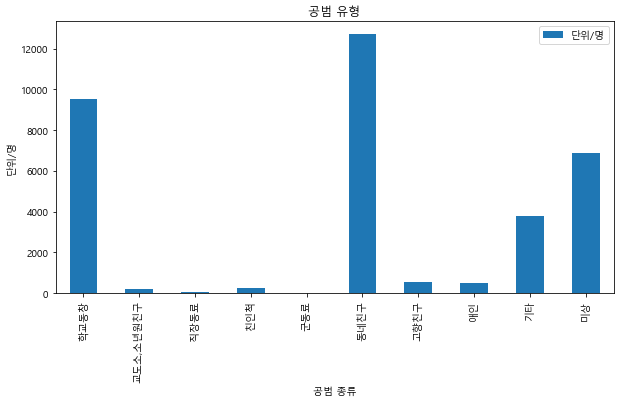

In [140]:
df_acc11.plot.bar(figsize=(10,5))
plt.title("공범 유형")
plt.xlabel("공범 종류")
plt.ylabel("단위/명")

In [142]:
df_acc11

,단위/명
학교동창,9543.0
"교도소,소년원친구",195.0
직장동료,63.0
친인척,234.0
군동료,2.0
동네친구,12711.0
고향친구,551.0
애인,471.0
기타,3784.0
미상,6875.0


In [144]:
df_acc12 = df_acc11.sort_values('단위/명',ascending=False)
df_acc12

,단위/명
동네친구,12711.0
학교동창,9543.0
미상,6875.0
기타,3784.0
고향친구,551.0
애인,471.0
친인척,234.0
"교도소,소년원친구",195.0
직장동료,63.0
군동료,2.0


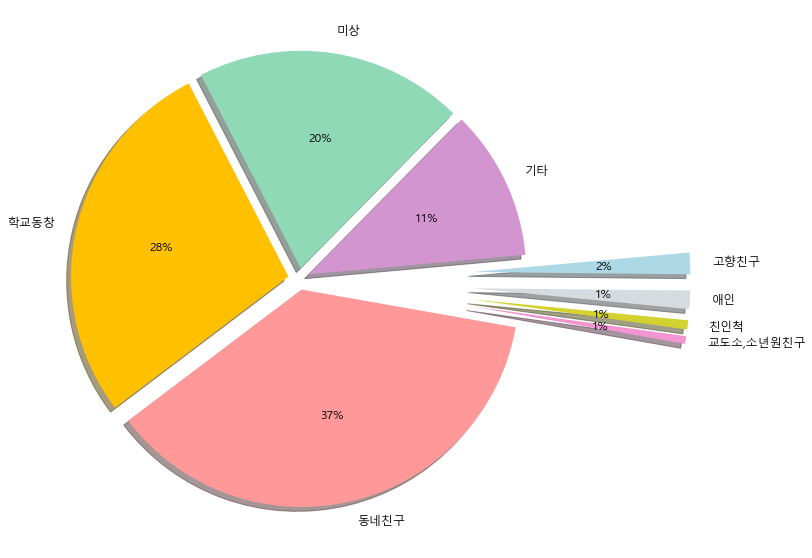

In [236]:
ratio = [12711.0,9543.0,6875.0,3849.0,551.0,471.0,234.0,195.0]
labels = ['동네친구','학교동창','미상','기타','고향친구','애인','친인척','교도소,소년원친구']
explode = [0.05,0.05, 0.05, 0.05, 0.8, 0.8, 0.8, 0.8]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#ADD8E6', '#D4DBE1','#D4D231','#f395d0']

plt.figure(figsize=(10,10))
plt.rc('font', size=12)
plt.pie(ratio, labels=labels, autopct='%.0f%%', startangle=-10, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

In [314]:
df_acc

,No,자료시점,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
0,No,자료시점,분류,분류,분류,계,단독범,공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),미상
1,No,자료시점,분류,분류,분류,계,단독범,공범(소계),학교동창,교도소·소년원친구,직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
2,No,자료시점,분류,분류,분류,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,1,2018년,계,계[입력치],계[입력치],66142,31713,27554,"9,543",195,63,234,2,"12,711",551,471,"3,784",6875
4,2,2018년,형법범,형법범계[입력치],형법범계[입력치],"54,205","22,845","25,818","9,100",188,46,224,2,"11,963",535,430,"3,330","5,542"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,116,2018년,특별법범,풍속영업의규제에관한법률,풍속영업의규제에관한법률,2,0,0,0,0,0,0,0,0,0,0,0,2
119,117,2018년,특별법범,학원의설립운영및과외교습에관한법률,학원의설립운영및과외교습에관한법률,0,0,0,0,0,0,0,0,0,0,0,0,0
120,118,2018년,특별법범,예비군법,예비군법,0,0,0,0,0,0,0,0,0,0,0,0,0
121,119,2018년,특별법범,화물자동차운수사업법,화물자동차운수사업법,0,0,0,0,0,0,0,0,0,0,0,0,0


In [315]:
df_acc = df_acc.rename(columns={'분류':'대분류', '분류.1':'중분류','분류.2':'소분류','계':'총합계',
                                              '계.1':'단독범','계.2':'공범 소계', '계.3':'학교동창', '계.4':'교도소,소년원친구',
                                              '계.5':'직장동료','계.6':'친인척','계.7':'군동료','계.8':'동네친구',
                                              '계.9':'고향친구','계.10':'애인','계.11':'기타','계.12':'미상'})

In [316]:
df_acc

,No,자료시점,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
0,No,자료시점,분류,분류,분류,계,단독범,공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),미상
1,No,자료시점,분류,분류,분류,계,단독범,공범(소계),학교동창,교도소·소년원친구,직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
2,No,자료시점,분류,분류,분류,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,1,2018년,계,계[입력치],계[입력치],66142,31713,27554,"9,543",195,63,234,2,"12,711",551,471,"3,784",6875
4,2,2018년,형법범,형법범계[입력치],형법범계[입력치],"54,205","22,845","25,818","9,100",188,46,224,2,"11,963",535,430,"3,330","5,542"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,116,2018년,특별법범,풍속영업의규제에관한법률,풍속영업의규제에관한법률,2,0,0,0,0,0,0,0,0,0,0,0,2
119,117,2018년,특별법범,학원의설립운영및과외교습에관한법률,학원의설립운영및과외교습에관한법률,0,0,0,0,0,0,0,0,0,0,0,0,0
120,118,2018년,특별법범,예비군법,예비군법,0,0,0,0,0,0,0,0,0,0,0,0,0
121,119,2018년,특별법범,화물자동차운수사업법,화물자동차운수사업법,0,0,0,0,0,0,0,0,0,0,0,0,0


In [336]:
df_acc33 = df_acc.loc[3:3]
df_acc33

,No,자료시점,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
3,1,2018년,계,계[입력치],계[입력치],66142,31713,27554,"9,543",195,63,234,2,"12,711",551,471,"3,784",6875


In [337]:
datas = ['총합계','단독범','공범 소계','미상']

for data in datas:
    df_acc33[data]=df_acc33[data].str.replace(',','')
    
df_acc33

<ipython-input-337-a5ab2fa4e712>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc33[data]=df_acc33[data].str.replace(',','')


,No,자료시점,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
3,1,2018년,계,계[입력치],계[입력치],66142,31713,27554,"9,543",195,63,234,2,"12,711",551,471,"3,784",6875


In [338]:
df_acc33['총합계'] = df_acc33['총합계'].astype(float)
df_acc33['단독범'] = df_acc33['단독범'].astype(float)
df_acc33['공범 소계'] = df_acc33['공범 소계'].astype(float)
df_acc33['미상'] = df_acc33['미상'].astype(float)

<ipython-input-338-958a43edf8bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc33['총합계'] = df_acc33['총합계'].astype(float)
<ipython-input-338-958a43edf8bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc33['단독범'] = df_acc33['단독범'].astype(float)
<ipython-input-338-958a43edf8bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [350]:
df_acc33

,No,자료시점,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
3,1,2018년,계,계[입력치],계[입력치],66142.0,31713.0,27554.0,"9,543",195,63,234,2,"12,711",551,471,"3,784",6875.0


In [375]:
df_acc44 = df_acc33.drop(['No','자료시점','대분류','중분류','소분류','학교동창','교도소,소년원친구','직장동료','친인척','군동료','동네친구','고향친구','애인','기타'], axis='columns')

In [376]:
df_acc44

,총합계,단독범,공범 소계,미상
3,66142.0,31713.0,27554.0,6875.0


In [377]:
df_sum = df_acc44.loc[[3], :]
df_sum

,총합계,단독범,공범 소계,미상
3,66142.0,31713.0,27554.0,6875.0


In [388]:
sum = df_sum.iloc[0, 0]

ratio = []

for i in df_sum.iloc[0][1:]:
    ratio.append(i/sum*100)
    
print(ratio)

[47.94684164373621, 41.658855190348035, 10.394303165915757]


In [394]:
labels = df_sum.columns[1:].tolist()
explode = [0.05, 0.05, 0.05]
colors = ['#D9FAE9', '#D6EEE0', '#B8D0C3']
plt.figure(figsize=(10,10))
plt.rc('font', size=12)

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=200, counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.show()

ValueError: Image size of 43486980x43487063 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

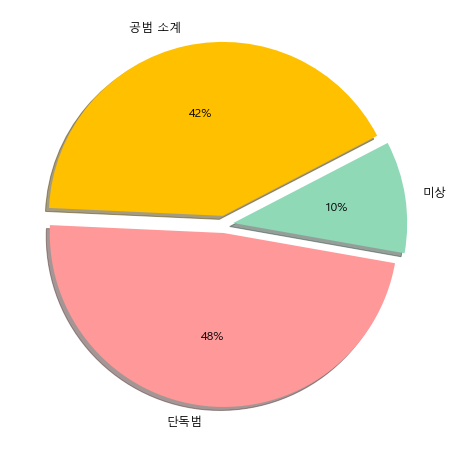

In [396]:
ratio = [31713.0,27554.0,6875.0]
labels = ['단독범','공범 소계','미상']
explode = [0.05,0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6']

plt.figure(figsize=(8,8))
plt.rc('font', size=12)
plt.pie(ratio, labels=labels, autopct='%.0f%%', startangle=-10, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()